<a href="https://colab.research.google.com/github/romitsutaria/Todo_NodeJs/blob/main/IIT_Kharagpur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

#https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.metrics  import  accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [7]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [6]:
path='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [13]:
data = pd.read_csv(path, names = headernames)
data.shape

(150, 5)

In [15]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#Demo and experiments
X_train.shape

(105, 4)

array([[ 1.60880897,  0.26574922,  1.27799505,  0.77237476],
       [-0.29860039, -0.59282519,  0.6652577 ,  1.02581023],
       [-0.06017422, -0.80746879,  0.77666449,  0.8990925 ],
       [-1.13309199,  0.05110562, -1.22865776, -1.38182672],
       [ 0.5358912 ,  0.69503643,  1.05518147,  1.53268117],
       [-1.49073125,  0.69503643, -1.28436116, -1.12839125],
       [ 0.89353046, -0.37818159,  0.49814751,  0.13878609],
       [-1.25230508, -0.16353798, -1.28436116, -1.12839125],
       [-1.01387891, -0.16353798, -1.17295437, -1.25510899],
       [-0.53702657,  0.69503643, -1.11725097, -1.25510899],
       [-0.77545274, -0.80746879,  0.10822374,  0.26550382],
       [ 0.17825195,  0.69503643,  0.44244412,  0.51893929],
       [ 0.29746503, -0.59282519,  0.55385091,  0.01206836],
       [-0.29860039, -0.80746879,  0.27533393,  0.13878609],
       [-0.06017422, -0.80746879,  0.10822374,  0.01206836],
       [ 2.08566131, -0.16353798,  1.61221543,  1.15252797],
       [-1.72915742,  0.

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [45]:
y_pred=classifier.predict(X_train)

In [46]:
accuracy=accuracy_score(y_train,y_pred)

In [47]:
print("Accuracy =",accuracy)

Accuracy = 0.9714285714285714


In [50]:
y_pred = classifier.predict(X_test)

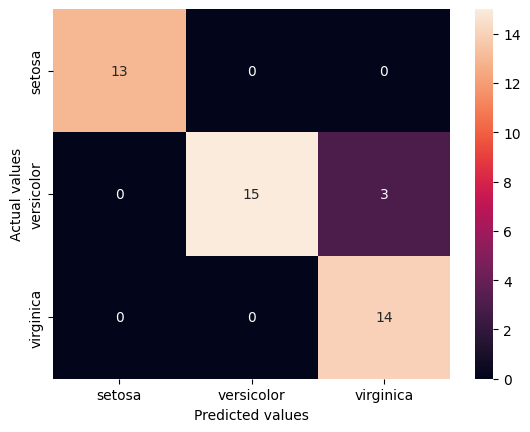

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)


sns.heatmap(result, annot=True, fmt='g',  xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [60]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.83      0.91        18
 Iris-virginica       0.82      1.00      0.90        14

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.95      0.93      0.93        45

Accuracy: 0.9333333333333333


In [65]:
from sklearn.svm import SVC
accuracy_list=[]

for i in ['linear','poly','rbf','sigmoid']:
  clf=SVC(kernel=i)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  accuracy_list.append(accuracy)
  print("Accuracy for",i,"kernel:",accuracy)



Accuracy for linear kernel: 0.9555555555555556
Accuracy for poly kernel: 0.9111111111111111
Accuracy for rbf kernel: 0.9777777777777777
Accuracy for sigmoid kernel: 0.8666666666666667


In [72]:
accuracies={
    'Linear':accuracy_list[0],
    'Poly':accuracy_list[1],
    'RBC':accuracy_list[2],
    'Sigmoid':accuracy_list[3]
}


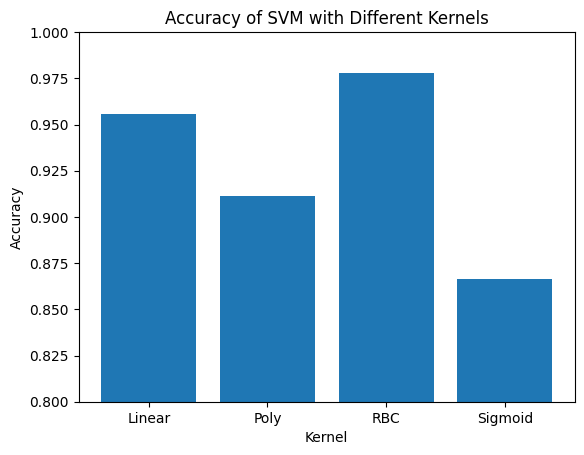

In [73]:
# prompt: plot the accuracies

import matplotlib.pyplot as plt

plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM with Different Kernels')
plt.ylim(0.8,1.0)
plt.show()
